## Analyse Benchmark Testbed

In [42]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import pickle

DATA_NAME = 'university_k_6_L_2_n_10_chancap500_numchans1_mldat2e6_bidirectional'
# DATA_NAME = 'ndf50_mldat6e6_load0.4_university'
path_to_benchmark_data = '/scratch/datasets/trafpy/management/flowcentric/{}_testbed_data_v8.obj'.format(DATA_NAME)
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [43]:
%autoreload
# unpack env dicts into list of env objects
envs = tb_dict['envs']

In [44]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

# analyse
analysers = [EnvAnalyser(env, time_units='\u03BCs', info_units='B', subject_class_name=env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    analyser.compute_metrics(measurement_start_time='auto',
                             measurement_end_time='auto',
                             print_summary=True)



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.2_repeat_0_scheduler_SRPT'
Measurement duration: 2473297.5636004857 (Start time : 274810.840400054 μs | End time: 2748108.40400054 μs)
Total number of generated demands (jobs or flows) passed to env: 316918
Total number of these demands which arrived during measurement period: 285018
Total info arrived: 7365598741.0 B
Total info transported: 6722242758.0 B
Load (abs): 2978.0479508003805 B/μs
Load (frac): 0.1985365300533587 fraction of network capacity requested.
Throughput (abs): 2717.9272146349194 B/μs
Throughput (frac): 0.9126539463222709 fraction of arrived info successfully transported.
T-Score: 28.132873346491316

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 316918
Total number of these flows which arrived during measurement period: 285018
Time first flow arrived: 274832.45529671 μs
Time last flow 



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.2_repeat_0_scheduler_FF'
Measurement duration: 2473297.5636004857 (Start time : 274810.840400054 μs | End time: 2748108.40400054 μs)
Total number of generated demands (jobs or flows) passed to env: 316918
Total number of these demands which arrived during measurement period: 285018
Total info arrived: 7365598741.0 B
Total info transported: 7101865007.0 B
Load (abs): 2978.0479508003805 B/μs
Load (frac): 0.1985365300533587 fraction of network capacity requested.
Throughput (abs): 2871.415518908089 B/μs
Throughput (frac): 0.9641938499131173 fraction of arrived info successfully transported.
T-Score: 22.56254589036318

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 316918
Total number of these flows which arrived during measurement period: 285018
Time first flow arrived: 274832.45529671 μs
Time last flow arri



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.4_repeat_0_scheduler_SRPT'
Measurement duration: 2551342.456200069 (Start time : 283482.495133341 μs | End time: 2834824.9513334096 μs)
Total number of generated demands (jobs or flows) passed to env: 633836
Total number of these demands which arrived during measurement period: 570328
Total info arrived: 15364889388.0 B
Total info transported: 9422851074.0 B
Load (abs): 6022.276370881326 B/μs
Load (frac): 0.40148509139208843 fraction of network capacity requested.
Throughput (abs): 3693.291369451929 B/μs
Throughput (frac): 0.613271650452574 fraction of arrived info successfully transported.
T-Score: -497.2557479828023

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 633836
Total number of these flows which arrived during measurement period: 570328
Time first flow arrived: 283486.2086521233 μs
Time last flo



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.5_repeat_0_scheduler_FF'
Measurement duration: 2078530.132800668 (Start time : 230947.79253340757 μs | End time: 2309477.9253340755 μs)
Total number of generated demands (jobs or flows) passed to env: 633836
Total number of these demands which arrived during measurement period: 570157
Total info arrived: 15505041150.0 B
Total info transported: 10365992909.0 B
Load (abs): 7459.618172149415 B/μs
Load (frac): 0.4973078781432943 fraction of network capacity requested.
Throughput (abs): 4987.174708423678 B/μs
Throughput (frac): 0.6685562978334952 fraction of arrived info successfully transported.
T-Score: -5379.153357855521

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 633836
Total number of these flows which arrived during measurement period: 570157
Time first flow arrived: 230951.69752867092 μs
Time last f

In [45]:
# TEMPORARY CELL FOR RENAMING ANY PREVIOUSLY SAVED SCHEDULER NAMES WITH NEW SHORTENED CONVENTION
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name == 'fair_share':
        analyser.env.scheduler.scheduler_name = 'FS'
    elif analyser.env.scheduler.scheduler_name == 'first_fit':
        analyser.env.scheduler.scheduler_name = 'FF'
    elif analyser.env.scheduler.scheduler_name == 'random':
        analyser.env.scheduler.scheduler_name = 'Rand'
    elif analyser.env.scheduler.scheduler_name == 'srpt_v2':
        analyser.env.scheduler.scheduler_name = 'SRPT'
    elif analyser.env.scheduler.scheduler_name[0:6] == 'lambda':
        analyser.env.scheduler.scheduler_name = '\u03BB' + str(analyser.env.scheduler._lambda) + 'S'
    analyser.subject_class_name = analyser.env.scheduler.scheduler_name

Load Subject      T-Score  Mean FCT (μs)  p99 FCT (μs)  Max FCT (μs)  \
0    0.1    SRPT    23.929821          366.8        2193.2      368762.7   
1    0.1      FS    20.224301          379.0        2617.3      349762.7   
2    0.1      FF    15.174021          525.8        4611.6      339762.7   
3    0.1    Rand    11.477380          451.5        3613.0      375762.7   
4    0.2      FS    28.806295          503.8        4520.0      922815.3   
5    0.2    SRPT    28.132873          457.7        2961.7     2074412.4   
6    0.2      FF    22.562546          842.3        8109.9     1030761.8   
7    0.2    Rand   -65.709239         1068.9       11595.7     2270867.4   
8    0.3    SRPT   -30.870892          562.3        4615.0     3140635.2   
9    0.3      FS   -50.727938         1231.9       16170.8     2541010.2   
10   0.3      FF   -65.638794         1459.1       16145.1     3102072.8   
11   0.3    Rand  -372.147039         4316.0       65603.2     2218633.9   
12   0.4      FS  -358.475834         3230.1       58983.6     2180661.9   
13   0.4    SRPT  -497.255748         1464.7        6984.2     2249204.0   
14   0.4      FF  -539.107400         4147.4       62630.0     2376179.5   
15   0.4    Rand -2429.209754        14451.5      189195.2     2514776.9   
16   0.5    SRPT -1525.114789         1170.5        6835.4     1929944.7   
17   0.5      FS -1903.805930        10650.2      198729.3     1398228.1   
18   0.5      FF -5379.153358        18987.4      294685.2     2067352.4   
19   0.5    Rand -5816.053855        26878.4      277907.0     1892859.9   

    Throughput Frac  Frac Flows Dropped  Frac Info Dropped  
0          0.978677            0.000189             0.0213  
1          0.967120            0.000210             0.0329  
2          0.978495            0.000238             0.0215  
3          0.966642            0.000259             0.0334  
4          0.955809            0.000137             0.0442  
5          0.912654            0.000140             0.0873  
6          0.964194            0.000172             0.0358  
7          0.810229            0.000670             0.1900  
8          0.748224            0.000500             0.2520  
9          0.836319            0.000612             0.1640  
10         0.825061            0.000696             0.1750  
11         0.688308            0.002430             0.3120  
12         0.733240            0.002340             0.2670  
13         0.613272            0.003120             0.3870  
14         0.739212            0.003360             0.2610  
15         0.570951            0.014000             0.4290  
16         0.431482            0.008930             0.5690  
17         0.580392            0.011100             0.4200  
18         0.668556            0.030700             0.3310  
19         0.447126            0.033200             0.5530

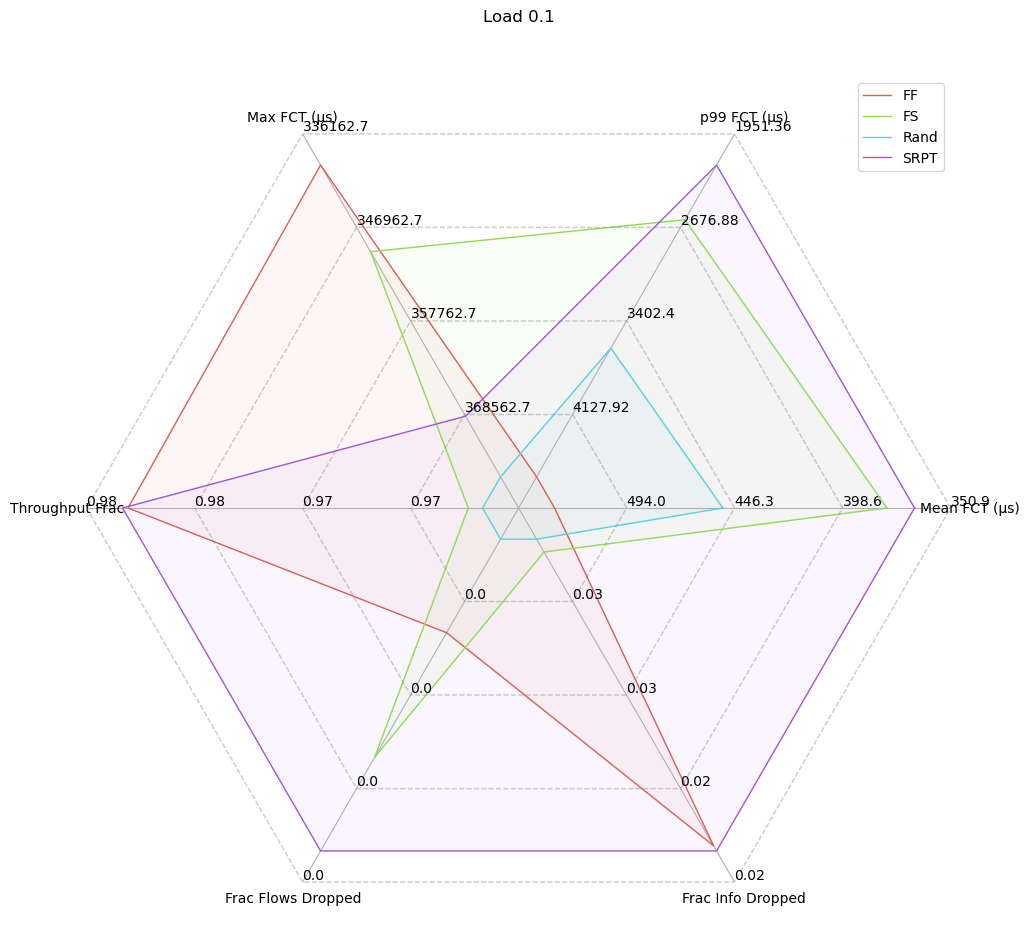

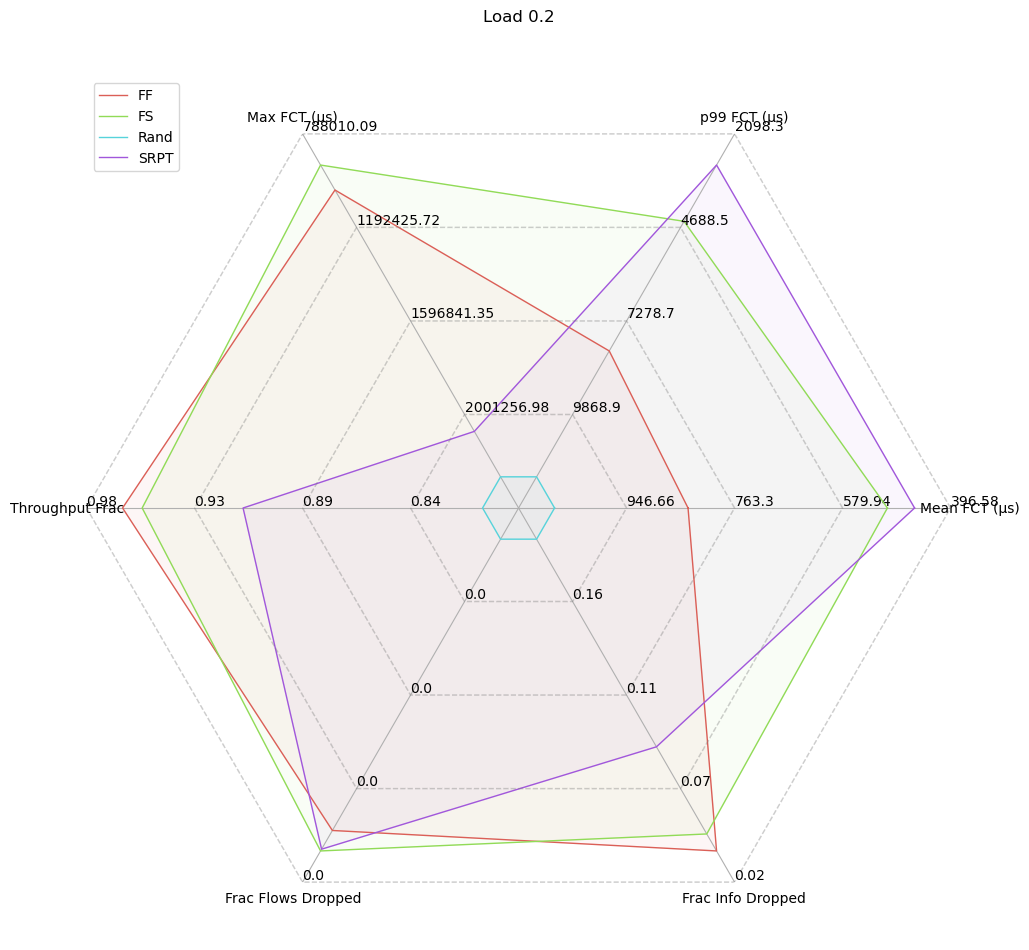

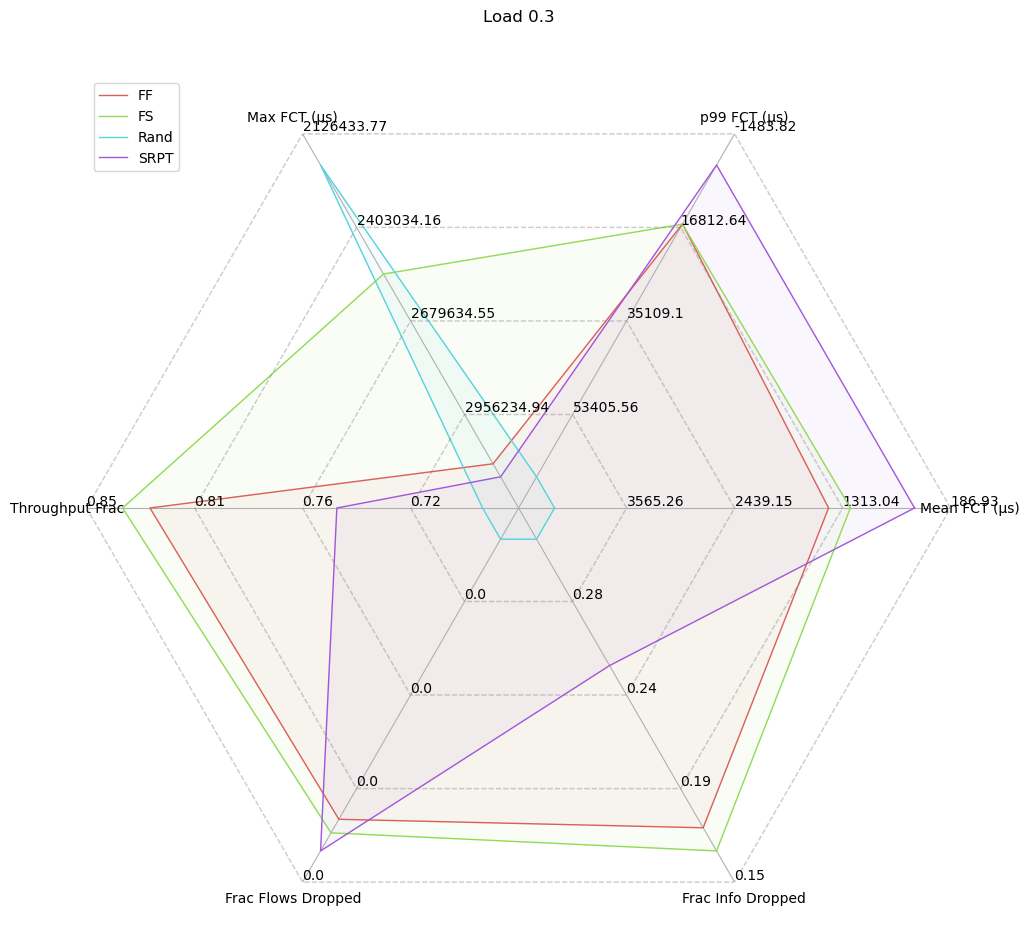

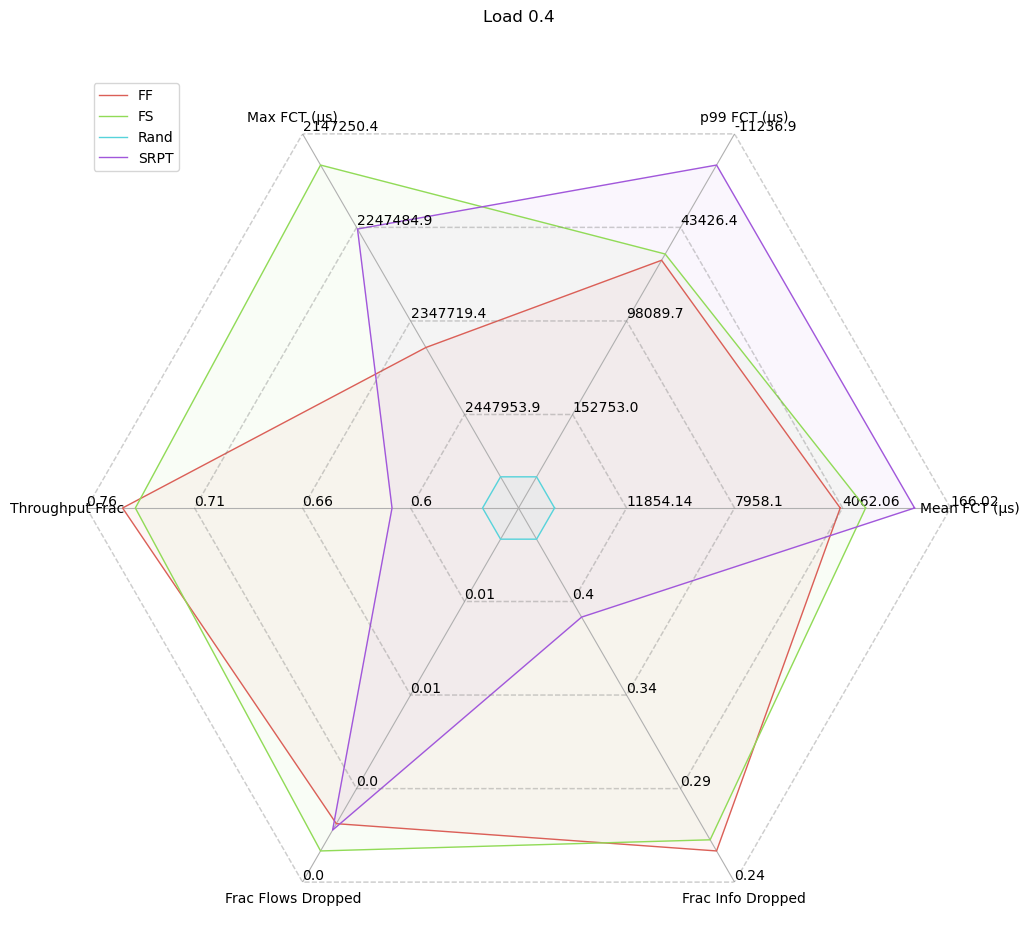

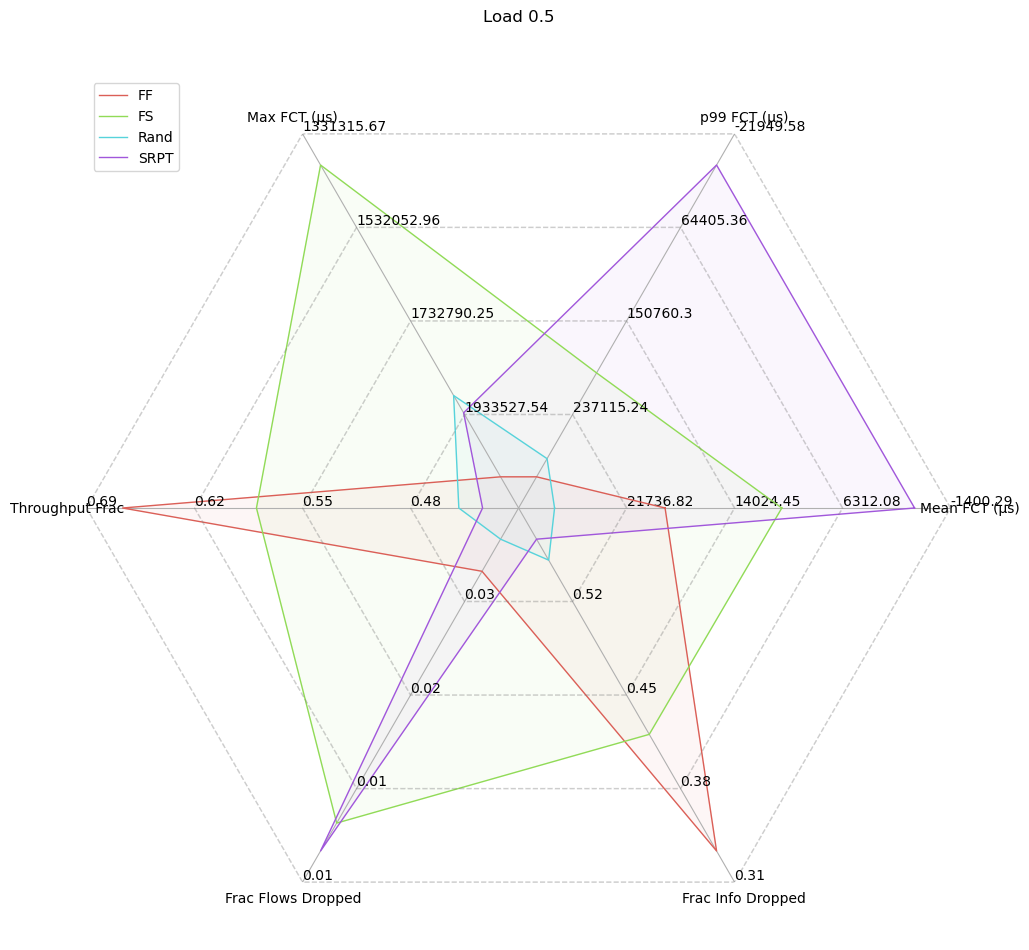

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.style.use(plot_style)
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.style.use(plot_style)
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/zciccwf/phd_project/projects/trafpy/traf

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/zciccwf/phd_project/projects/trafpy/traf

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if logscale:
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if logscale:
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:641: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/zciccwf/phd_project/projects/trafpy/traf

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

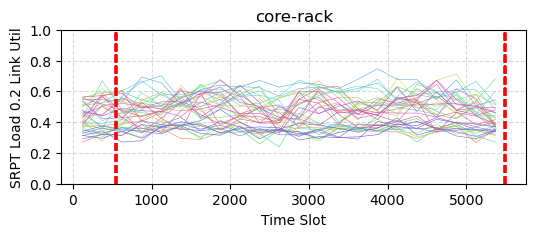

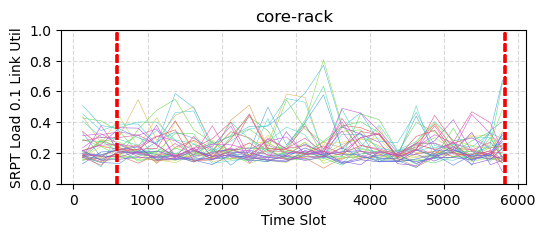

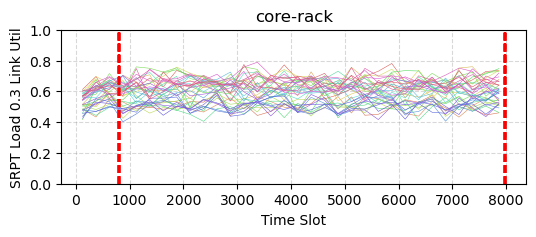

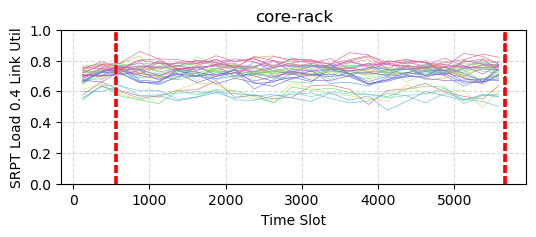

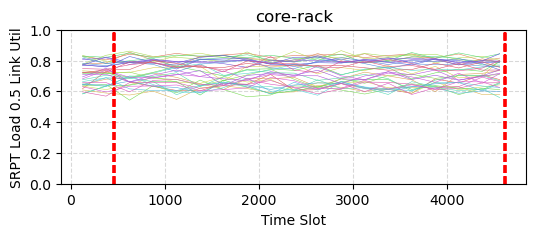

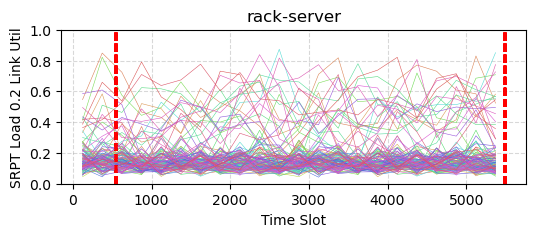

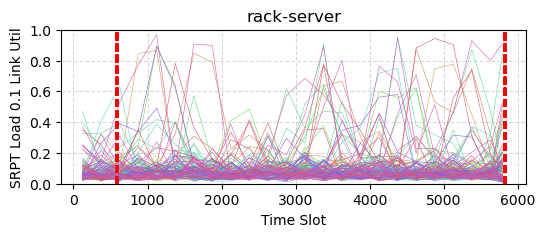

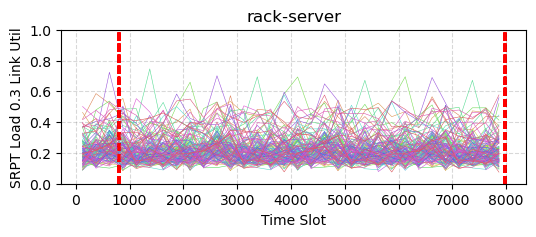

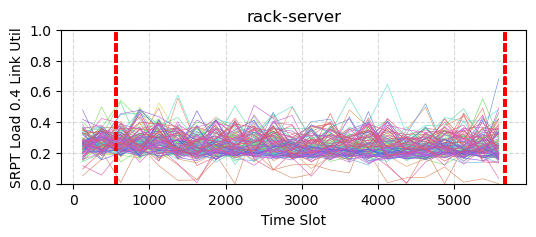

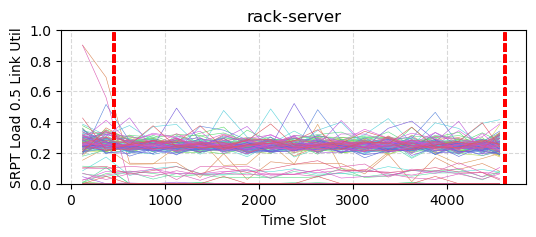

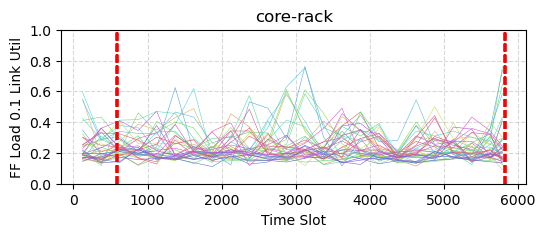

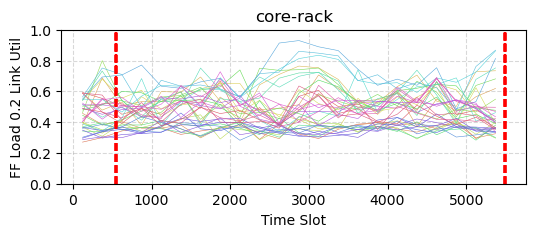

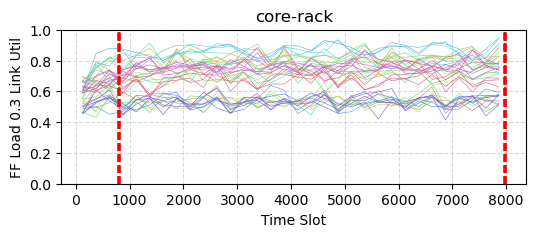

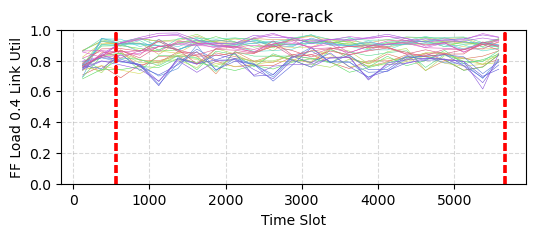

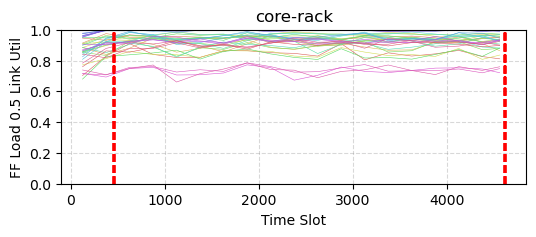

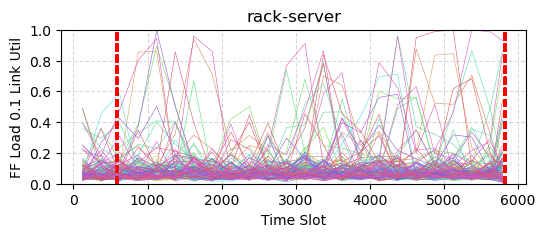

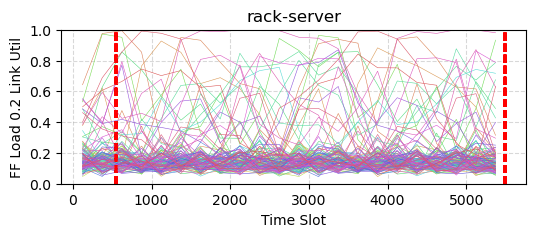

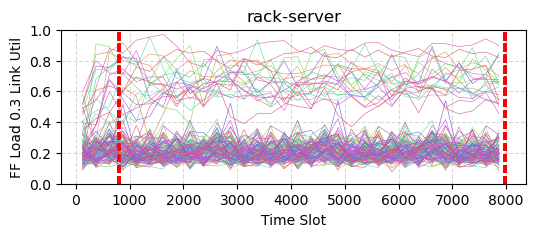

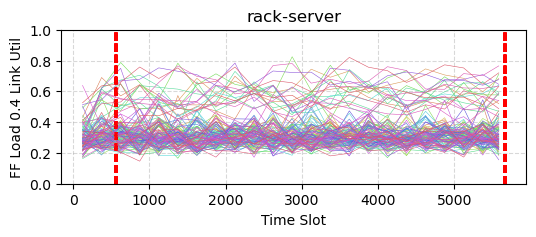

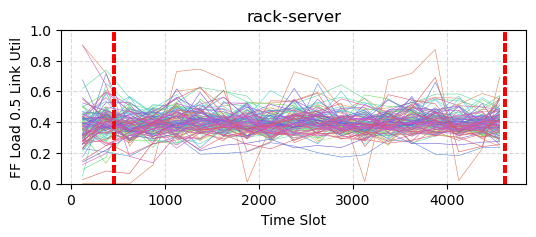

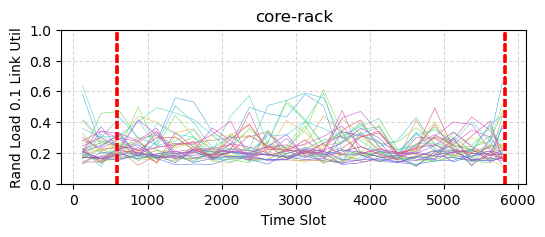

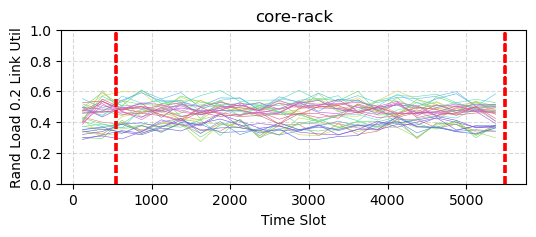

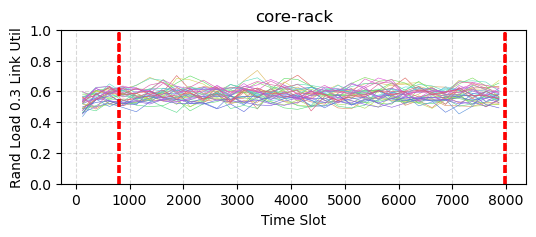

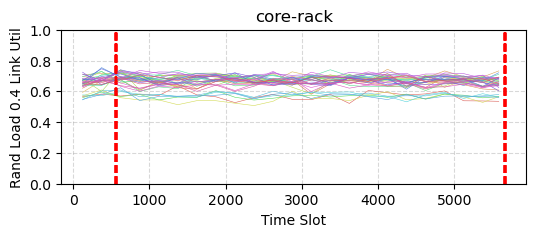

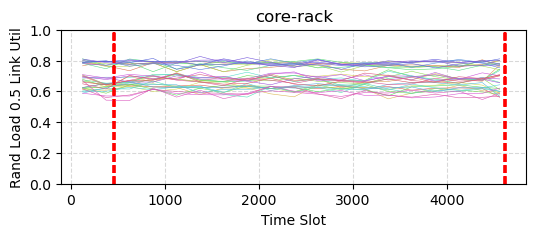

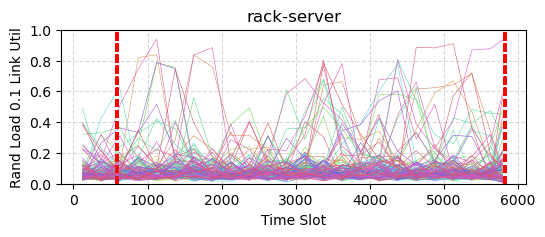

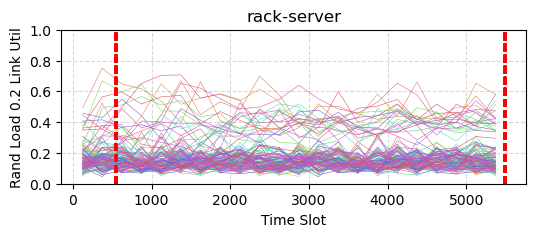

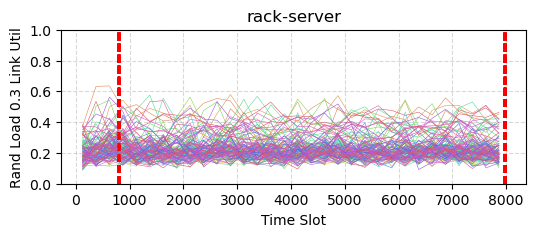

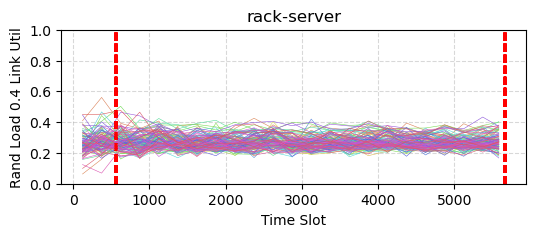

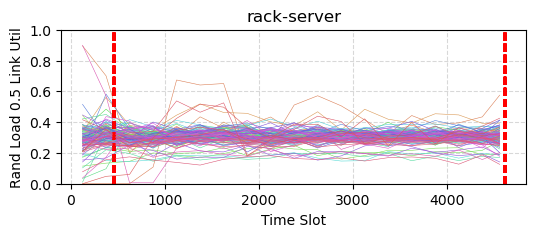

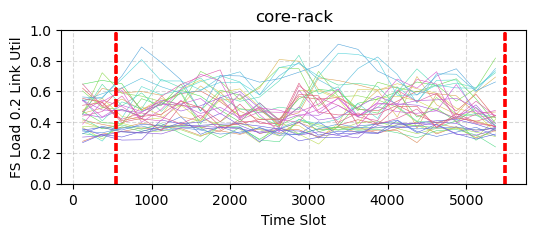

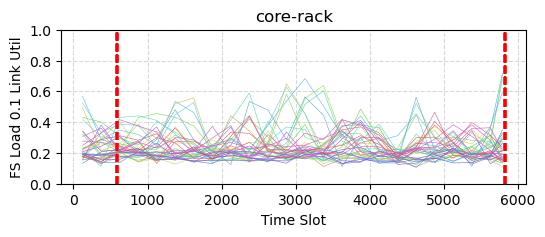

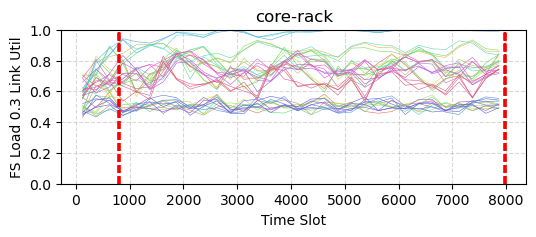

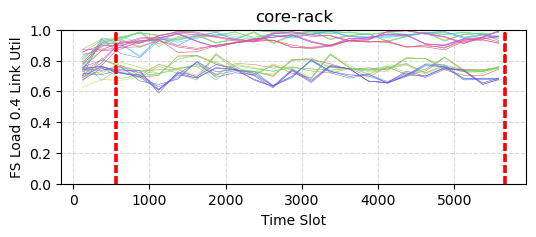

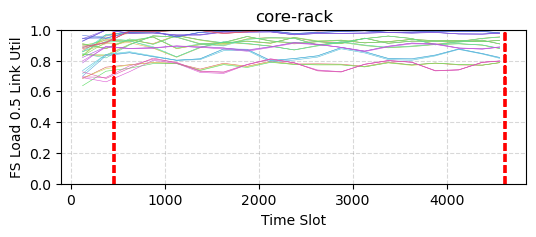

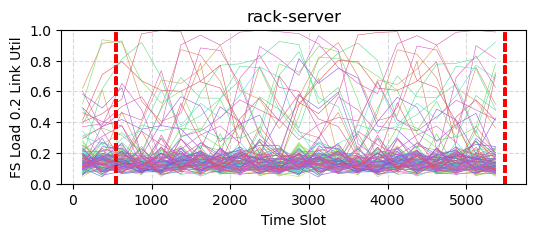

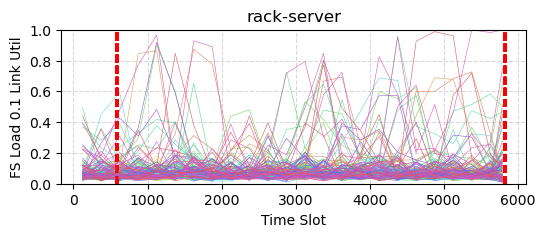

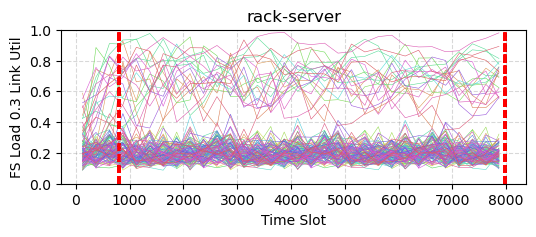

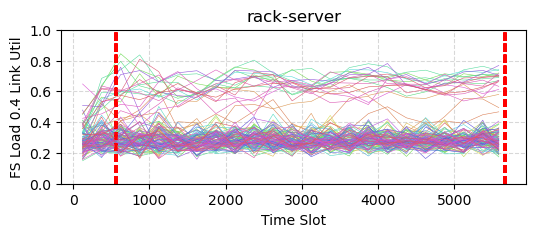

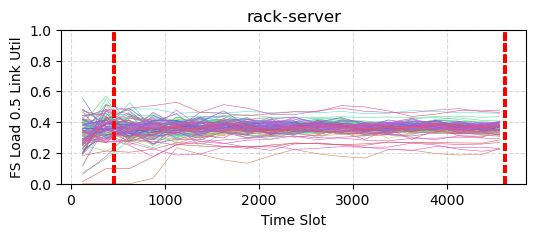

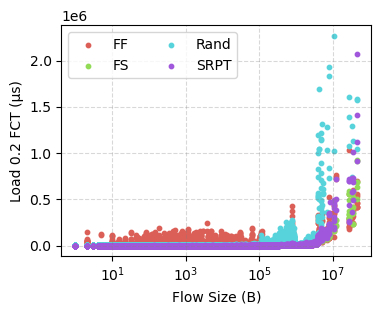

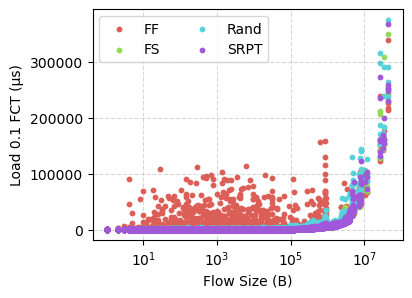

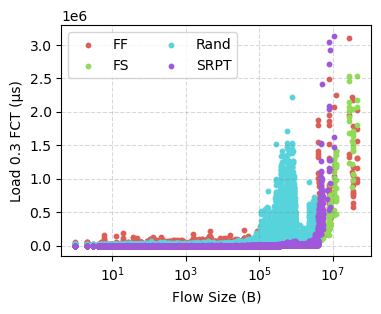

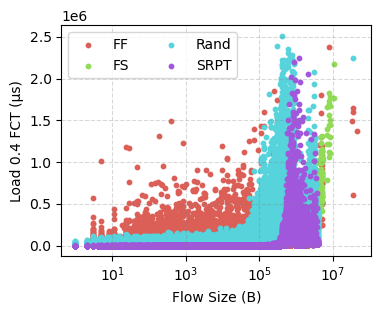

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


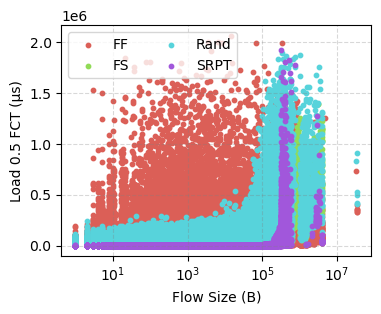

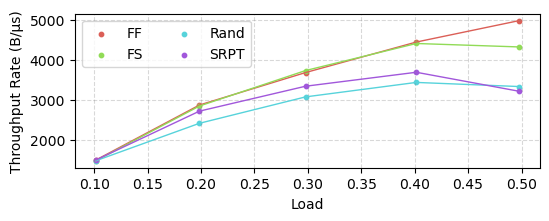

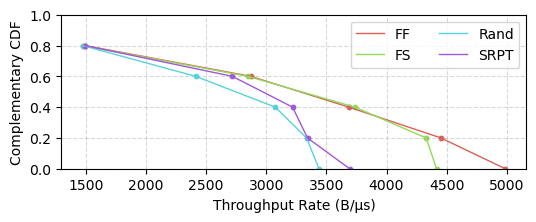

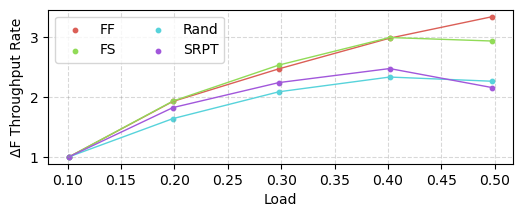

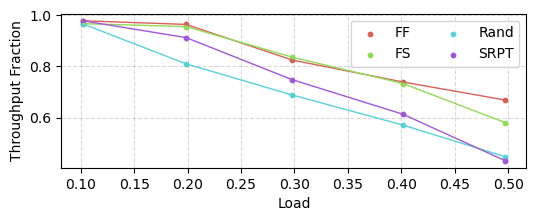

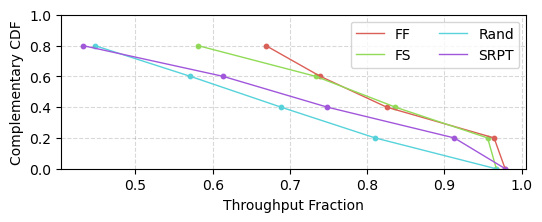

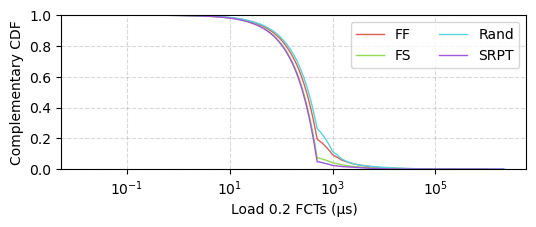

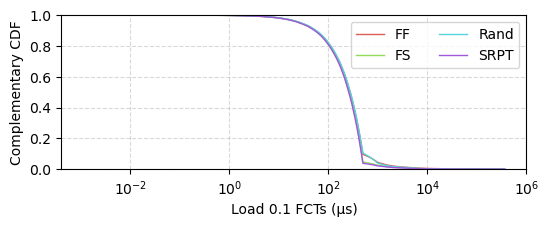

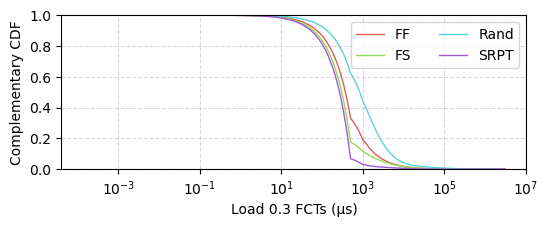

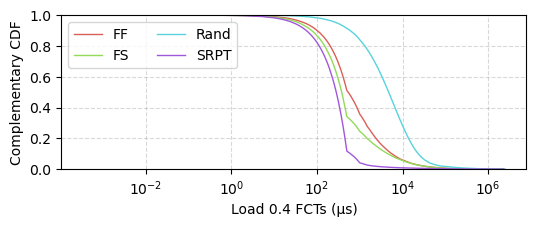

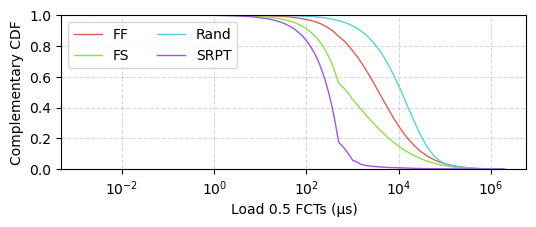

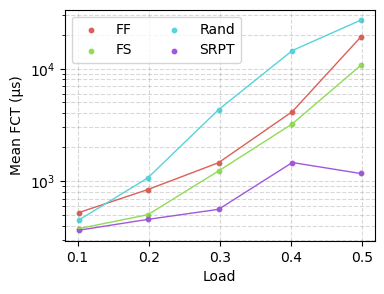

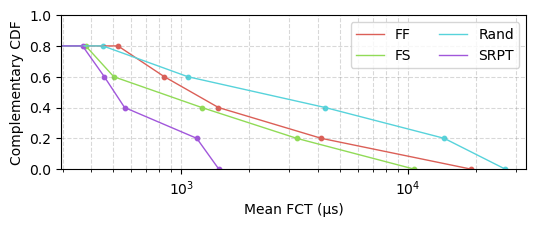

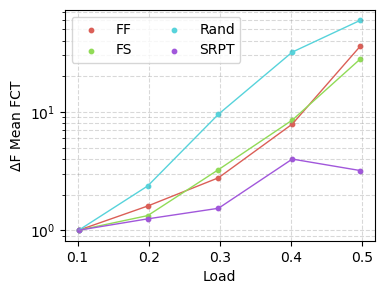

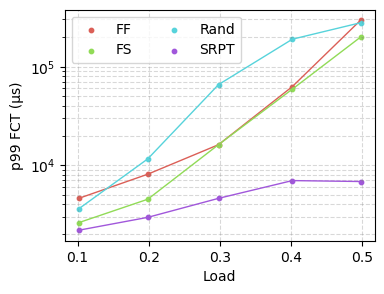

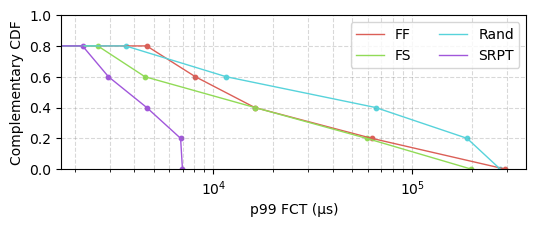

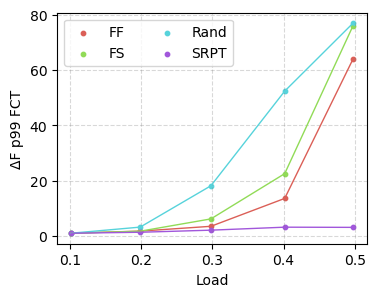

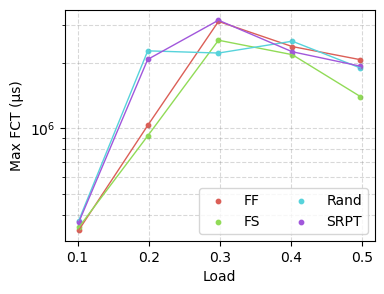

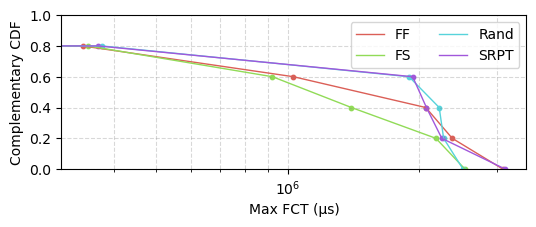

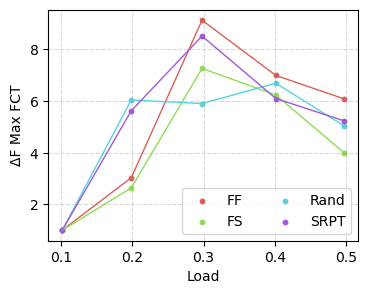

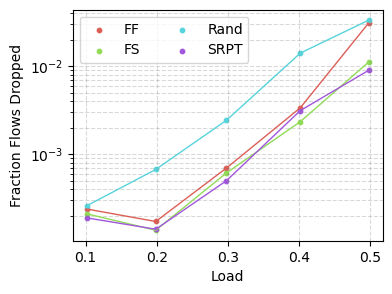

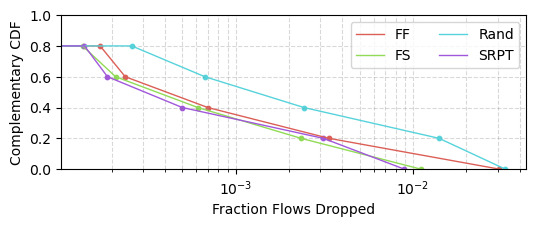

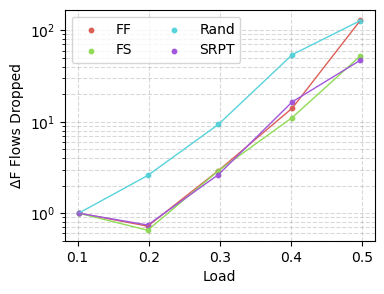

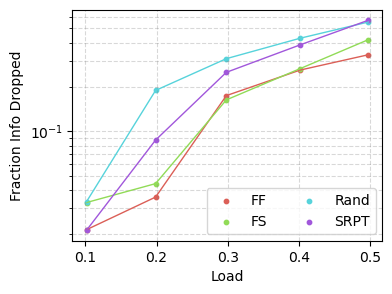

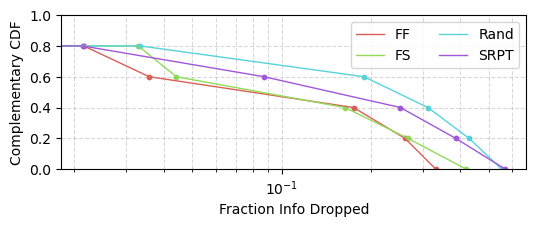

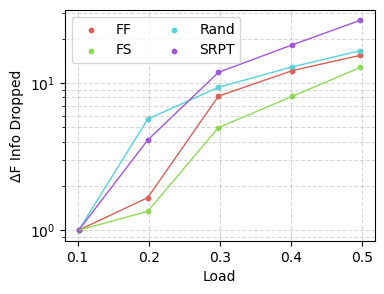

In [46]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter
    
# plot
plotter = EnvsPlotter(time_units='\u03BCs', info_units='B')
_ = plotter.display_t_score_table(*analysers, display_table=True)
# _ = plotter.plot_t_score_scatter(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)

# COMMENT IF HAVEN'T TRACKED QUEUE EVOLUTION AND SCHEDULER DECISION COLOUR GRID
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
# _ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)

# COMMENT IF WANT TO SAVE TIME
_ = plotter.plot_link_utilisation_vs_time_for_different_loads(*analysers, mean_period=250, figsize=(6, 2), legend_ncol=2, plot_legend=False) # mean_period=2500
# _ = plotter.plot_link_concurrent_demands_vs_time_for_different_loads(*analysers, mean_period=500)




_ = plotter.plot_demand_completion_time_vs_size_for_different_loads(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)
_ = plotter.plot_throughput_rate_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_throughput_frac_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_fcts_cdf_for_different_loads(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_mean_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_max_fct_vs_load(*analysers, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_info_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)

In [ ]:
# CUSTOM RADAR PLOT(S)
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

time_units = '\u03BCs'
info_units = 'B'

plot_dict = {'Mean FCT ({})'.format(time_units): {'range': [0, 1], 'classes': {'class1': 0.2,
                                                         'class2': 0.4}},
             'p99 FCT ({})'.format(time_units): {'range': [0, 100], 'classes': {'class1': 60,
                                                           'class2': 20}},
             'Max FCT ({})'.format(time_units): {'range': [1, 5], 'classes': {'class1': 2,
                                                         'class2': 5}},
             'Throughput Rate ({}/{})'.format(info_units, time_units): {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Info Dropped': {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Flows Dropped': {'range': [10, 0], 'classes': {'class1': 1,
                                                          'class2': 2}}
            }

_ = tpg.plot_radar(plot_dict)

# Custom Plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


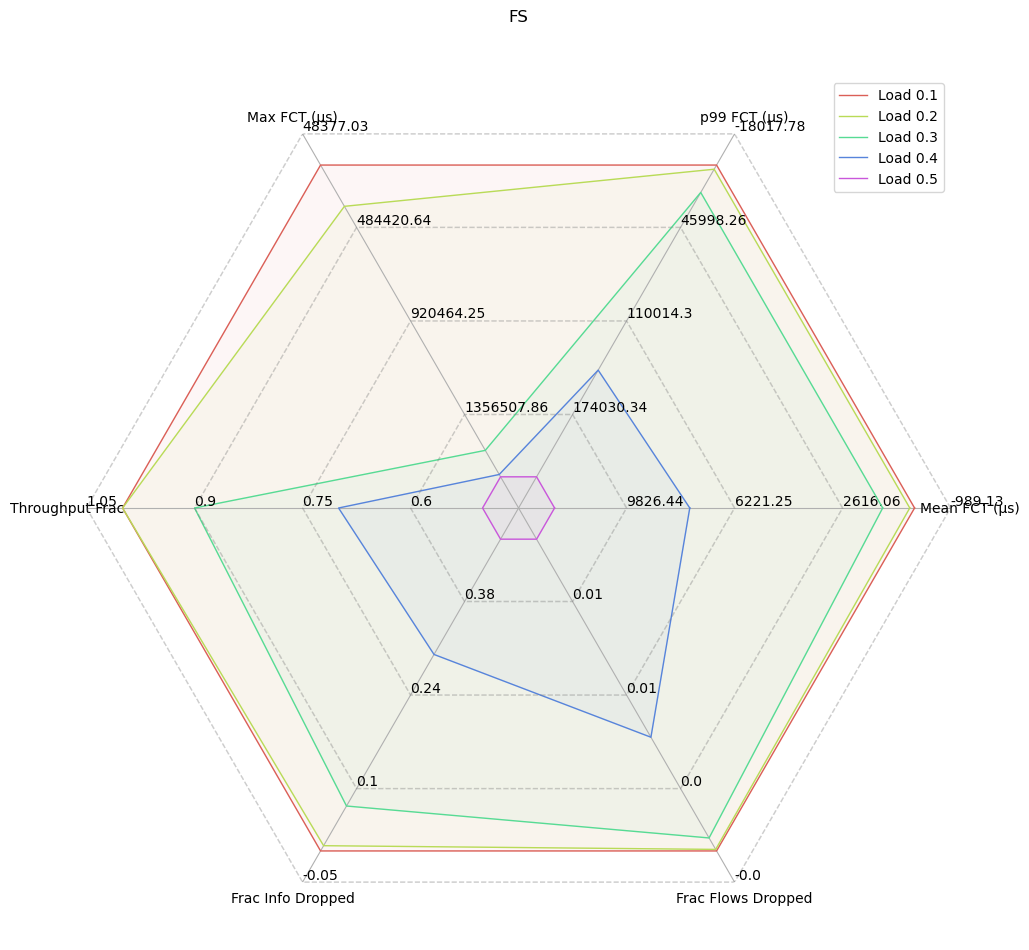

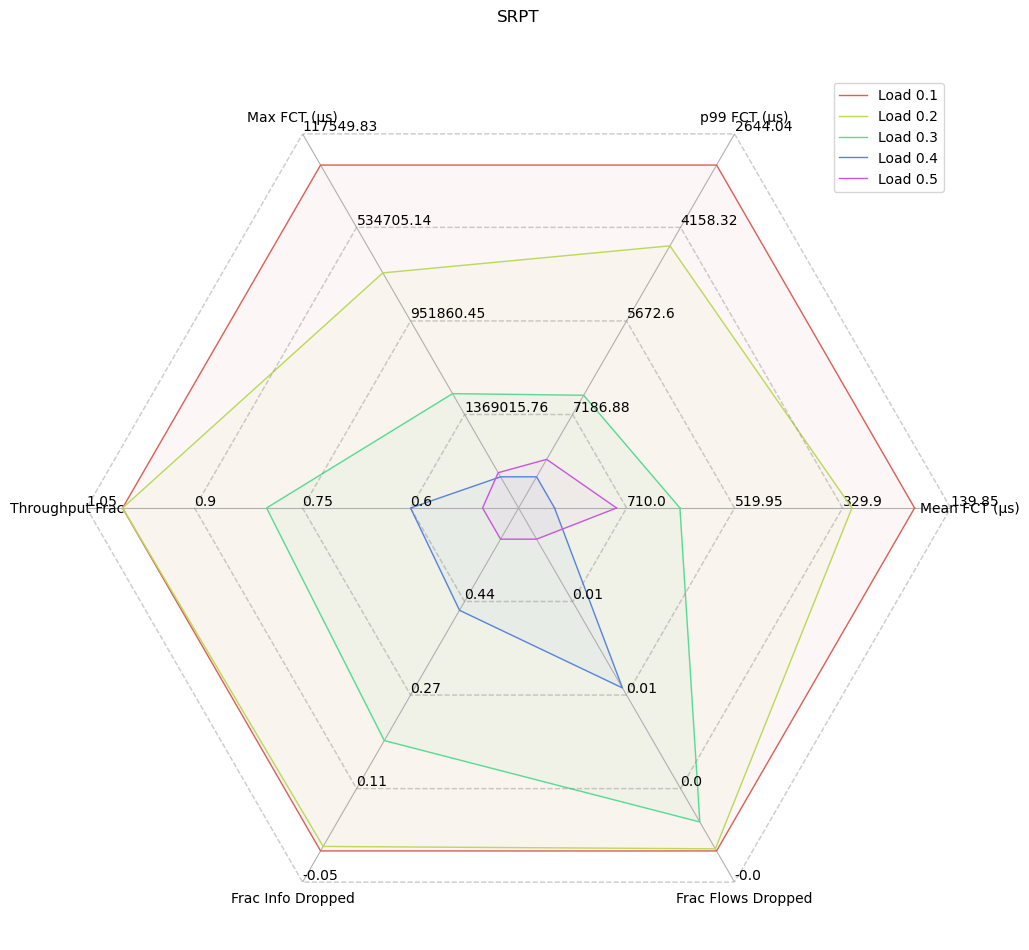

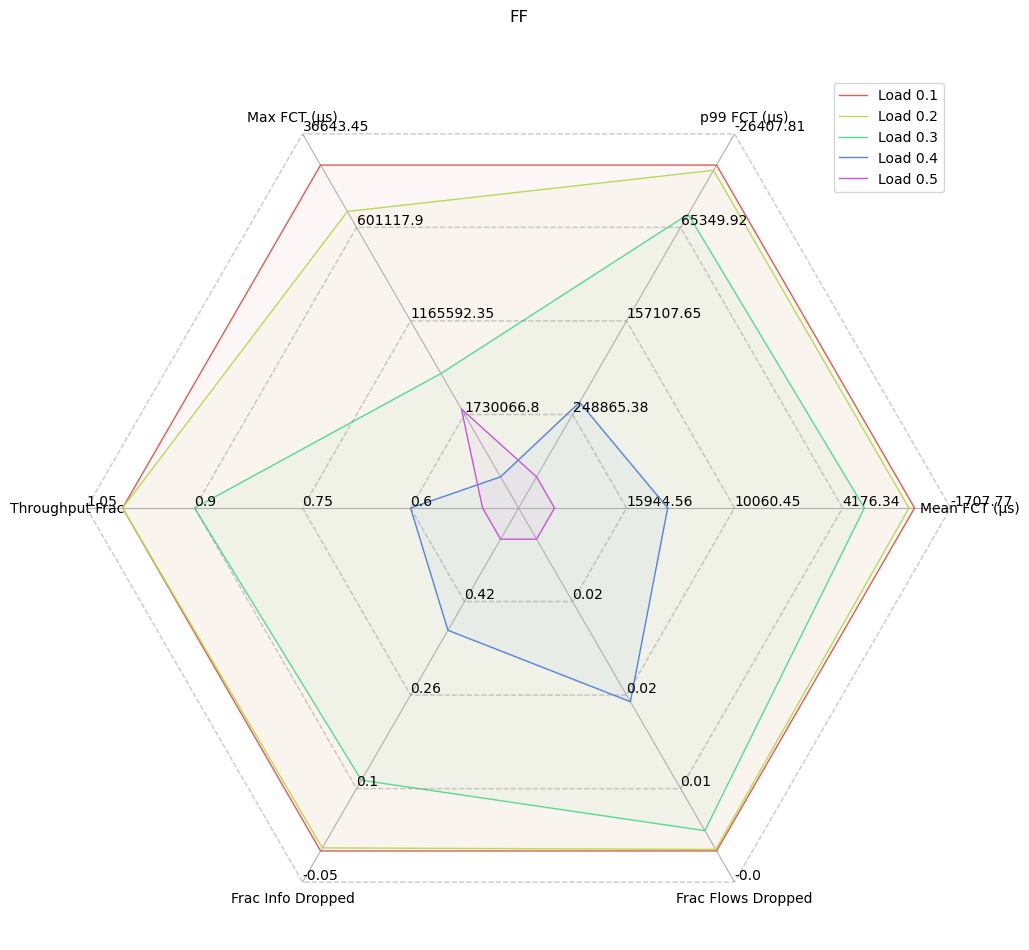

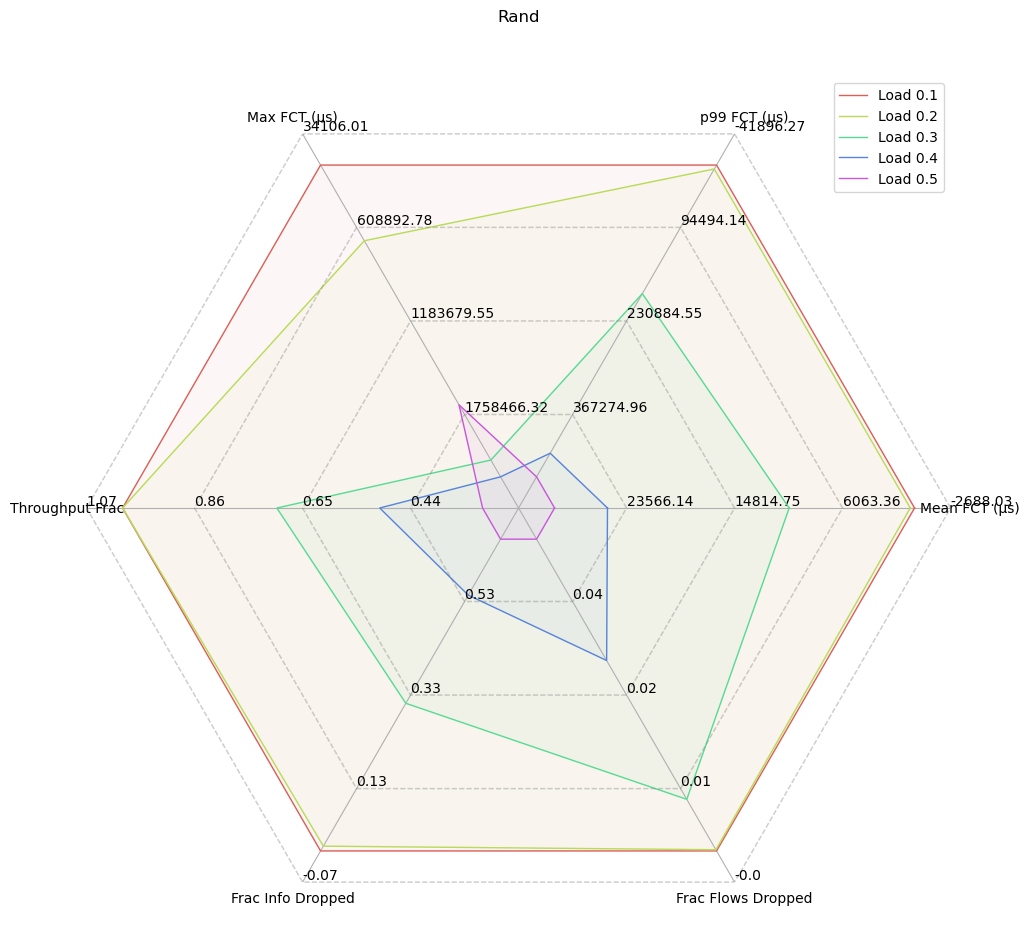

In [21]:
# PLOT SCHEDULER SENSITIVITY TO LOAD
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

from collections import defaultdict
import sigfig


def get_summary_dict(analysers, headers, time_units='', info_units=''):
    summary_dict = {header: [] for header in headers}
    for analyser in analysers:
        # self._check_analyser_valid(analyser)
        summary_dict['Load'].append(round(analyser.load_frac, 2))
        summary_dict['Subject'].append(analyser.subject_class_name)
        summary_dict['T-Score'].append(analyser.t_score)
        summary_dict['Mean FCT ({})'.format(time_units)].append(round(analyser.mean_fct, 1))
        summary_dict['p99 FCT ({})'.format(time_units)].append(round(analyser.nn_fct, 1))
        summary_dict['Max FCT ({})'.format(time_units)].append(round(analyser.max_fct, 1))
        summary_dict['Throughput Frac'].append(round(analyser.throughput_frac, 1))
        summary_dict['Frac Flows Dropped'].append(sigfig.round(analyser.dropped_flow_frac, sigfigs=3))
        summary_dict['Frac Info Dropped'].append(sigfig.round(analyser.dropped_info_frac, sigfigs=3))
    return summary_dict



time_units = '\u03BCs'
info_units = 'B'
headers = ['Load',
           'T-Score',
           'Subject',
           'Mean FCT ({})'.format(time_units),
           'p99 FCT ({})'.format(time_units),
           'Max FCT ({})'.format(time_units),
           'Throughput Frac',
           'Frac Info Dropped',
           'Frac Flows Dropped']
dont_plot_headers = ['Load', 'T-Score', 'Subject']
plot_headers = [header for header in headers if header not in dont_plot_headers]
# determine if higher is better for each header
is_higher_better = {}
for header in headers:
    if header == 'T-Score' or header == 'Throughput Frac':
        is_higher_better[header] = True
    else:
        is_higher_better[header] = False

scheduler_to_analysers = {}
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name not in scheduler_to_analysers:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name] = [analyser]
    else:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name].append(analyser)

for scheduler_name in scheduler_to_analysers.keys():
    nested_dict = lambda: defaultdict(nested_dict)
    plot_dict = nested_dict()
    
    anys = scheduler_to_analysers[scheduler_name]
    summary_dict = get_summary_dict(anys, headers, time_units=time_units, info_units=info_units)
    
    for header in plot_headers:
        min_val, max_val = min(summary_dict[header]), max(summary_dict[header])
        
#         if is_higher_better[header]:
#             # want higher (better) values on outer radar edge -> don't flip range
#             _range = [0.9*min(summary_dict[header]), 1.1*max(summary_dict[header])]
#         else:
#             # want lower (better) values on outer radar edge -> flip range
#             _range = [1.1*max(summary_dict[header]), 0.9*min(summary_dict[header])]
            
        diff = max(max_val - min_val, 1e-9)
        min_val -= (0.1*diff)
        max_val += (0.1*diff)
        _range = [min_val, max_val]
#         _range = [max(min_val, 1e-9), max(max_val, 1e-9)]
        if not is_higher_better[header]:
            # flip axis
            _range = _range[::-1]

        plot_dict[header]['range'] = _range
        for i, load in enumerate(summary_dict['Load']):
            plot_dict[header]['classes']['Load {}'.format(str(load))] = summary_dict[header][i]
        
    tpg.plot_radar(plot_dict, 
                   title=scheduler_name,
                   fill=True,
                   fill_alpha=0.05,
                   figsize=(12.8, 9.6))
        
    

In [ ]:
# %autoreload
# import trafpy
# import trafpy.generator as tpg
# from trafpy.manager import RandomAgent, RWA, Demand, DCN, EnvAnalyser
# import json

# DATA_BAME = 'artificial_light_chancap10'
# path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
# benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))
# benchmarks = list(benchmark_data.keys())

# SLOT_SIZE = 1.0
# PACKET_SIZE = 1
# NUM_CHANNELS = 1
# NUM_K_PATHS = 1
# MAX_FLOWS = 10
# MAX_TIME = None

In [ ]:
# network = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=10)
# rwa = RWA(tpg.gen_channel_names(NUM_CHANNELS), NUM_K_PATHS)
# scheduler = RandomAgent(network, rwa, slot_size=SLOT_SIZE, packet_size=PACKET_SIZE)

# num_benchmark_tests = 0
# for benchmark in benchmarks:
#     for load in benchmark_data[benchmark]:
#         for repeat in benchmark_data[benchmark][load]:
#             num_benchmark_tests += 1

# for benchmark in benchmarks:
#     for load in list(benchmark_data[benchmark].keys()):
#         for repeat in benchmark_data[benchmark][load]:
#             if json.loads(load) == 0.1 and scheduler.scheduler_name == 'random':
#                 demand_data = benchmark_data[benchmark][load][repeat]
#                 demand = tpg.Demand(demand_data)
#                 env = DCN(network, demand, scheduler, num_k_paths=NUM_K_PATHS, slot_size=SLOT_SIZE, max_flows=MAX_FLOWS, max_time=MAX_TIME)
#                 print(env.slot_size)
                
#                 observation = env.reset()
#                 scheduler.register_env(env)
                
#                 while True:
#                     action = scheduler.get_action(observation)
#                     observation, reward, done, info = env.step(action)
                    
#                     if done:
#                         print('Completed')
#                         analyser = EnvAnalyser(env)
#                         analyser.compute_metrics(print_summary=True)

In [ ]:
# packet size = info
# slot size = sec
# min bandwidth in network = info per sec

# assume that 1 packet size of info can be transferred per sub slot
# info per sub slot = 1 packet = packet size
# sub slot size = (info per sub slot / min bandwidth in network) * slot size

In [ ]:
a = None
if a is not None:
    print('not none')
else:
    print('None')

In [ ]:
increment_time = 1.001
print(round(1-(increment_time-1),6))

In [ ]:
ep_link_capacity = 500
